In [2]:
# Prerequisites
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (353, 10)
Test shape: (89, 10)


In [4]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation Metrics
metrics = {
    "Train MSE": mean_squared_error(y_train, y_train_pred),
    "Test MSE": mean_squared_error(y_test, y_test_pred),
    "Train MAE": mean_absolute_error(y_train, y_train_pred),
    "Test MAE": mean_absolute_error(y_test, y_test_pred),
    "Train R²": r2_score(y_train, y_train_pred),
    "Test R²": r2_score(y_test, y_test_pred)
}

pd.DataFrame(metrics, index=["Value"]).T


,Value
Train MSE,2868.549703
Test MSE,2900.193628
Train MAE,43.483504
Test MAE,42.794095
Train R²,0.527919
Test R²,0.452603


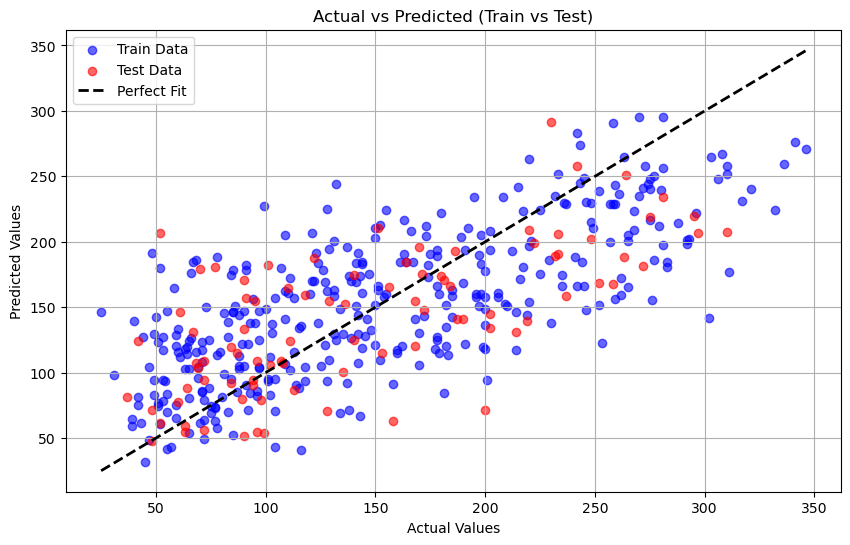

In [6]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))

# Train
plt.scatter(y_train, y_train_pred, color="blue", alpha=0.6, label="Train Data")
# Test
plt.scatter(y_test, y_test_pred, color="red", alpha=0.6, label="Test Data")

# Perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2, label="Perfect Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Train vs Test)")
plt.legend()
plt.grid(True)
plt.show()


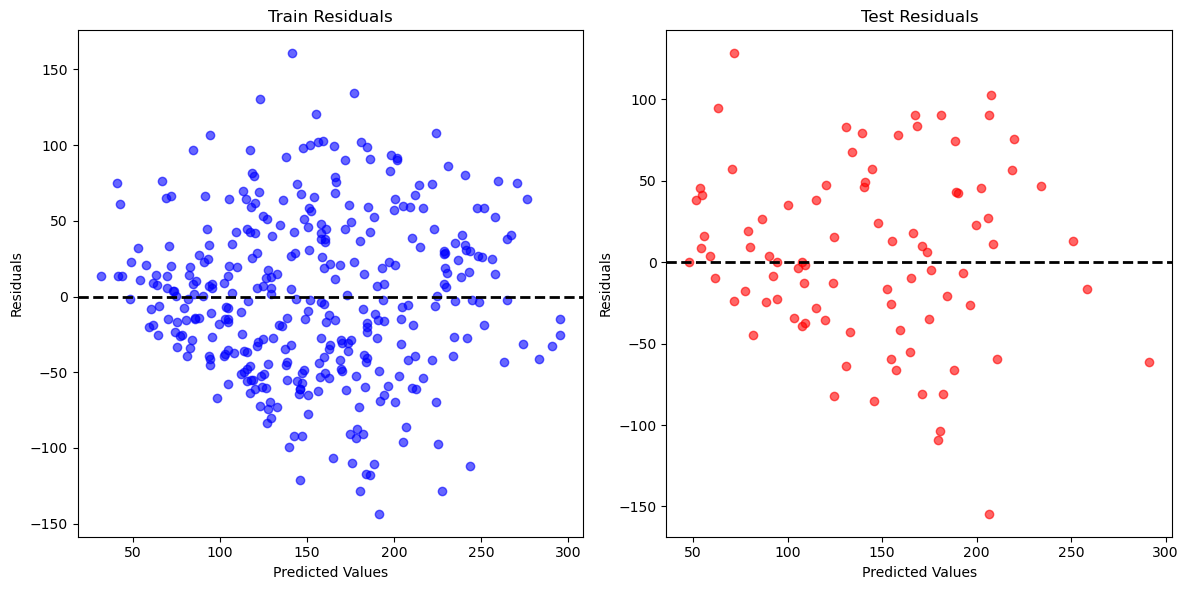

In [19]:
# Residuals = Actual - Predicted
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(12, 6))

# Train residuals
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Train Residuals")

# Test residuals
plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, color="red", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Test Residuals")

plt.tight_layout()
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

# Scale features again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now Lasso CV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_cv = Lasso(alpha=0.1, max_iter=10000)
cv_scores = cross_val_score(lasso_cv, X_train_scaled, y_train, cv=5, scoring="r2")

print("Cross-validation R² scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))


Cross-validation R² scores: [0.54311516 0.36944163 0.50313263 0.6154963  0.22514341]
Average CV R²: 0.4512658234188952


Number of non-zero coefficients: 10
Number of zero coefficients (pruned): 0


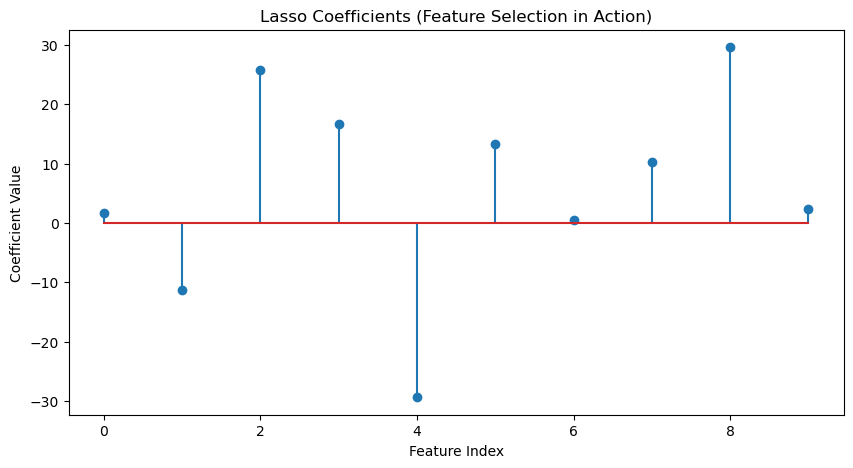

In [25]:
# Train final Lasso on full training set
lasso_final = Lasso(alpha=0.1, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = lasso_final.coef_

# Count non-zero vs zero coefficients
non_zero = np.sum(coefficients != 0)
zero = np.sum(coefficients == 0)

print("Number of non-zero coefficients:", non_zero)
print("Number of zero coefficients (pruned):", zero)

# Visualize
plt.figure(figsize=(10, 5))
plt.stem(coefficients)   # removed use_line_collection
plt.title("Lasso Coefficients (Feature Selection in Action)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()


Ridge R² Score: 0.45281775734917173
Lasso R² Score: 0.455541399027904


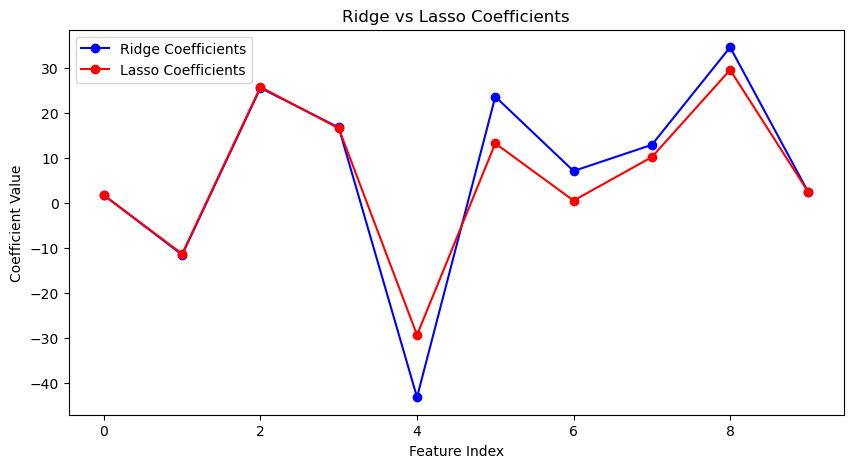

In [28]:
# Ridge vs Lasso comparison
from sklearn.linear_model import Ridge

# Train Ridge and Lasso with same alpha
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1, max_iter=10000)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

ridge_score = ridge.score(X_test_scaled, y_test)
lasso_score = lasso.score(X_test_scaled, y_test)

print("Ridge R² Score:", ridge_score)
print("Lasso R² Score:", lasso_score)

# Coefficient comparison
plt.figure(figsize=(10, 5))
plt.plot(ridge.coef_, "bo-", label="Ridge Coefficients")
plt.plot(lasso.coef_, "ro-", label="Lasso Coefficients")
plt.legend()
plt.title("Ridge vs Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()
